<a href="https://colab.research.google.com/github/hiro106/statistics-ml-cs-learning/blob/main/bento_demand_prediction_signate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I traced the page below

https://signate.jp/competitions/24/tutorials/3

In [314]:
# From the middle of this notebook, I checked behaviors of pyplot, 
# executing the methods in various conditions and combinations.

*   「お弁当の需要予測」という小規模なデータセットのコンペを題材に、売上の要因を簡単に分析しながらモデルを組み立てるところまで実施
*   線形と非線形のモデル2つを作成し、これを組み合わせて予測を行う手法を今回は試みた
*    Trainデータでのクロスバリデーションの結果、RMSEは11前後程度となった



# **Introduction**
*  「お弁当の需要予測」は実際にお昼に販売されたお弁当の売り上げ数を予測する問題で、回帰問題として分類される
*   データサイズはとても小さいが、生のデータであり、データ加工等の工夫が検討できる良いデータセットである
*   まずはデータを読み込み、売り上げ数と説明変数との関係を簡単な基礎分析で見ていく



In [315]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [316]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [317]:
import pandas as pd

In [318]:
pd

<module 'pandas' from '/usr/local/lib/python3.7/dist-packages/pandas/__init__.py'>

In [319]:
pd.DataFrame

pandas.core.frame.DataFrame

In [320]:
import numpy as np

In [321]:
np

<module 'numpy' from '/usr/local/lib/python3.7/dist-packages/numpy/__init__.py'>

In [322]:
from matplotlib import pyplot as plt

In [323]:
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [324]:
import seaborn as sns

In [325]:
sns

<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

In [326]:
# sns.set(font="IPAexGothic", style="white")

In [327]:
pd.set_option('max_rows', 100)
pd.set_option('min_rows', 20)

In [328]:
train = pd.read_csv("/drive/My Drive/Colab Notebooks/signate/bento/train.csv")

In [329]:
train

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1
5,2013-11-25,135,月,1,鶏の唐揚,NaN,NaN,NaN,NaN,曇,--,14.6
6,2013-11-26,145,火,0,豚のスタミナ炒め,NaN,NaN,NaN,NaN,快晴,--,17.9
7,2013-11-27,140,水,1,ボローニャ風カツ,NaN,NaN,NaN,NaN,晴れ,--,14.7
8,2013-11-28,151,木,0,ハンバーグ,NaN,NaN,NaN,NaN,薄曇,--,17.7
9,2013-11-29,116,金,0,タルタルinソーセージカツ,NaN,NaN,NaN,NaN,快晴,--,12.1


In [330]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       207 non-null    object 
 1   y              207 non-null    int64  
 2   week           207 non-null    object 
 3   soldout        207 non-null    int64  
 4   name           207 non-null    object 
 5   kcal           166 non-null    float64
 6   remarks        21 non-null     object 
 7   event          14 non-null     object 
 8   payday         10 non-null     float64
 9   weather        207 non-null    object 
 10  precipitation  207 non-null    object 
 11  temperature    207 non-null    float64
dtypes: float64(3), int64(2), object(7)
memory usage: 19.5+ KB


In [331]:
test = pd.read_csv("/drive/My Drive/Colab Notebooks/signate/bento/test.csv")

In [332]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       40 non-null     object 
 1   week           40 non-null     object 
 2   soldout        40 non-null     int64  
 3   name           40 non-null     object 
 4   kcal           36 non-null     float64
 5   remarks        7 non-null      object 
 6   event          3 non-null      object 
 7   payday         2 non-null      float64
 8   weather        40 non-null     object 
 9   precipitation  40 non-null     object 
 10  temperature    40 non-null     float64
dtypes: float64(3), int64(1), object(7)
memory usage: 3.6+ KB


In [333]:
sample = pd.read_csv("/drive/My Drive/Colab Notebooks/signate/bento/sample.csv", header=None)

In [334]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       40 non-null     object
 1   1       40 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes


In [335]:
sample

,0,1
0,2014-10-1,24
1,2014-10-2,71
2,2014-10-3,25
3,2014-10-6,32
4,2014-10-7,60
5,2014-10-8,44
6,2014-10-9,64
7,2014-10-10,33
8,2014-10-14,67
9,2014-10-15,28


In [336]:
print("Data Shapes")
print("Train:", train.shape, "Test:", test.shape, "Sample:", sample.shape)

Data Shapes
Train: (207, 12) Test: (40, 11) Sample: (40, 2)


In [337]:
train.index = pd.to_datetime(train["datetime"])
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,,
2013-11-18,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
2013-11-19,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2013-11-20,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
2013-11-21,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
2013-11-22,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [338]:
# pandas.to_datetime

# Convert argument to datetime.

# This function converts a scalar, array-like, Series or DataFrame/dict-like 
# to a pandas datetime object.

In [339]:
train.describe()

,y,soldout,kcal,payday,temperature
count,207.000000,207.000000,166.000000,10.0,207.000000
mean,86.623188,0.449275,404.409639,1.0,19.252174
std,32.882448,0.498626,29.884641,0.0,8.611365
min,29.000000,0.000000,315.000000,1.0,1.200000
25%,57.000000,0.000000,386.000000,1.0,11.550000
50%,78.000000,0.000000,408.500000,1.0,19.800000
75%,113.000000,1.000000,426.000000,1.0,26.100000
max,171.000000,1.000000,462.000000,1.0,34.600000


In [340]:
type(train)

pandas.core.frame.DataFrame

In [341]:
train_name = train["name"]
train_name

datetime
2013-11-18         厚切りイカフライ
2013-11-19          手作りヒレカツ
2013-11-20       白身魚唐揚げ野菜あん
2013-11-21           若鶏ピリ辛焼
2013-11-22         ビッグメンチカツ
2013-11-25             鶏の唐揚
2013-11-26         豚のスタミナ炒め
2013-11-27         ボローニャ風カツ
2013-11-28            ハンバーグ
2013-11-29    タルタルinソーセージカツ
                  ...      
2014-09-16         チーズメンチカツ
2014-09-17         チキンフリカッセ
2014-09-18      カレイ唐揚げ 甘酢あん
2014-09-19          厚切イカフライ
2014-09-22              筑前煮
2014-09-24      白身魚のマスタード焼き
2014-09-25          牛カルビ焼き肉
2014-09-26         ランチビュッフェ
2014-09-29         豚肉と玉子の炒め
2014-09-30     鶏肉とカシューナッツ炒め
Name: name, Length: 207, dtype: object

In [342]:
type(train_name)

pandas.core.series.Series

In [343]:
len(train_name)

207

In [344]:
train_name_set = set(train_name)
train_name_set

{'いか天ぷら',
 'かじきの甘辛煮',
 'きのこソースハンバーグ',
 'さっくりメンチカツ',
 'さわら焼味噌掛け',
 'さんま辛味焼',
 'たっぷりベーコンフライ',
 'ひやしたぬきうどん・炊き込みご飯',
 'ぶりレモンペッパー焼き',
 'ますのマスタードソース',
 'やわらかロースのサムジョン',
 'アジ唐揚げ南蛮ソース',
 'エビフライ',
 'カキフライタルタル',
 'カレイの唐揚げ',
 'カレイ唐揚げ 甘酢あん',
 'カレイ唐揚げ夏野菜あん',
 'カレイ唐揚げ野菜あんかけ',
 'カレイ唐揚げ野菜餡かけ',
 'カレイ野菜あんかけ',
 'カレー入りソーセージカツ',
 'キスと野菜の天ぷら',
 'キーマカレー',
 'クリームチーズ入りメンチ',
 'ゴーヤチャンプルー',
 'サバ焼味噌掛け',
 'サーモンのムニエル2色ソース',
 'サーモンフライ・タルタル',
 'ジャンボチキンカツ',
 'ジューシーメンチカツ',
 'タルタルinソーセージカツ',
 'タンドリーチキン',
 'チキンのコーンクリーム焼き',
 'チキンの辛味噌焼き',
 'チキンカレー',
 'チキンクリームシチュー',
 'チキンステーキ・きのこソース',
 'チキンフリカッセ',
 'チキン南蛮',
 'チキン香草焼きマスタードソース',
 'チャプチェ',
 'チンジャオロース',
 'チーズハンバーグ',
 'チーズメンチカツ',
 'チーズ入りハンバーグ',
 'チーズ入りメンチカツ',
 'ハンバーグ',
 'ハンバーグカレーソース',
 'ハンバーグケッチャップソース',
 'ハンバーグデミソース',
 'ハンバーグ和風きのこソース',
 'ハンバーグ（デミきのこバター）',
 'バーベキューチキン',
 'ビッグメンチカツ',
 'ビーフカレー',
 'ビーフシチュー',
 'ビーフストロガノフ',
 'ビーフトマト煮',
 'プルコギ',
 'ホタテクリ―ムシチュー',
 'ボローニャ風カツ',
 'ポークカレー',
 'ポークソテー韓国ソース',
 'ポークハヤシ',
 'ポーク味噌焼き',
 'ポーク生姜焼き',
 'マーボ茄子',
 'マーボ豆腐',
 'メダイ照り焼',
 'メンチカツ',
 'ランチビュッフェ'

In [345]:
len(train_name_set)

156

In [346]:
print(type(train))
print(train.loc[train['payday'] == 1.0])

<class 'pandas.core.frame.DataFrame'>
              datetime    y week  soldout           name   kcal   remarks  \
datetime                                                                    
2013-12-10  2013-12-10  155    火        0  やわらかロースのサムジョン    NaN       NaN   
2014-01-10   2014-1-10   87    金        0       手作りロースカツ  440.0       NaN   
2014-02-10   2014-2-10  137    月        0    鶏の唐揚げおろしソース  423.0       NaN   
2014-03-10   2014-3-10  123    月        0   海老クリーミ―クノーデル  385.0       NaN   
2014-04-10   2014-4-10   87    木        0    鶏の唐揚げおろしソース  362.0       NaN   
2014-05-09    2014-5-9   58    金        1       手作りチキンカツ  434.0       NaN   
2014-06-10   2014-6-10   56    火        0    カレイ唐揚げ野菜餡かけ  426.0       NaN   
2014-07-10   2014-7-10   48    木        0           プルコギ  386.0       NaN   
2014-08-08    2014-8-8  129    金        0         チキンカレー    NaN  お楽しみメニュー   
2014-09-10   2014-9-10   54    水        0    ぶりレモンペッパー焼き  450.0       NaN   

           event  payday weather prec

In [347]:
train.describe(include="O")

,datetime,week,name,remarks,event,weather,precipitation
count,207,207,207,21,14,207,207
unique,207,5,156,6,2,7,8
top,2013-11-18,水,メンチカツ,お楽しみメニュー,ママの会,快晴,--
freq,1,43,6,12,9,53,169


In [348]:
train.describe()

,y,soldout,kcal,payday,temperature
count,207.000000,207.000000,166.000000,10.0,207.000000
mean,86.623188,0.449275,404.409639,1.0,19.252174
std,32.882448,0.498626,29.884641,0.0,8.611365
min,29.000000,0.000000,315.000000,1.0,1.200000
25%,57.000000,0.000000,386.000000,1.0,11.550000
50%,78.000000,0.000000,408.500000,1.0,19.800000
75%,113.000000,1.000000,426.000000,1.0,26.100000
max,171.000000,1.000000,462.000000,1.0,34.600000


In [349]:
train.describe(include="all")

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
count,207,207.000000,207,207.000000,207,166.000000,21,14,10.0,207,207,207.000000
unique,207,NaN,5,NaN,156,NaN,6,2,NaN,7,8,NaN
top,2013-11-18,NaN,水,NaN,メンチカツ,NaN,お楽しみメニュー,ママの会,NaN,快晴,--,NaN
freq,1,NaN,43,NaN,6,NaN,12,9,NaN,53,169,NaN
mean,NaN,86.623188,NaN,0.449275,NaN,404.409639,NaN,NaN,1.0,NaN,NaN,19.252174
std,NaN,32.882448,NaN,0.498626,NaN,29.884641,NaN,NaN,0.0,NaN,NaN,8.611365
min,NaN,29.000000,NaN,0.000000,NaN,315.000000,NaN,NaN,1.0,NaN,NaN,1.200000
25%,NaN,57.000000,NaN,0.000000,NaN,386.000000,NaN,NaN,1.0,NaN,NaN,11.550000
50%,NaN,78.000000,NaN,0.000000,NaN,408.500000,NaN,NaN,1.0,NaN,NaN,19.800000
75%,NaN,113.000000,NaN,1.000000,NaN,426.000000,NaN,NaN,1.0,NaN,NaN,26.100000


In [350]:
train["payday"]

datetime
2013-11-18   NaN
2013-11-19   NaN
2013-11-20   NaN
2013-11-21   NaN
2013-11-22   NaN
2013-11-25   NaN
2013-11-26   NaN
2013-11-27   NaN
2013-11-28   NaN
2013-11-29   NaN
              ..
2014-09-16   NaN
2014-09-17   NaN
2014-09-18   NaN
2014-09-19   NaN
2014-09-22   NaN
2014-09-24   NaN
2014-09-25   NaN
2014-09-26   NaN
2014-09-29   NaN
2014-09-30   NaN
Name: payday, Length: 207, dtype: float64

In [351]:
train["payday"] = train["payday"].fillna(0)

In [352]:
train["payday"]

datetime
2013-11-18    0.0
2013-11-19    0.0
2013-11-20    0.0
2013-11-21    0.0
2013-11-22    0.0
2013-11-25    0.0
2013-11-26    0.0
2013-11-27    0.0
2013-11-28    0.0
2013-11-29    0.0
             ... 
2014-09-16    0.0
2014-09-17    0.0
2014-09-18    0.0
2014-09-19    0.0
2014-09-22    0.0
2014-09-24    0.0
2014-09-25    0.0
2014-09-26    0.0
2014-09-29    0.0
2014-09-30    0.0
Name: payday, Length: 207, dtype: float64

In [353]:
set(train["payday"])

{0.0, 1.0}

In [354]:
train["precipitation"]

datetime
2013-11-18    --
2013-11-19    --
2013-11-20    --
2013-11-21    --
2013-11-22    --
2013-11-25    --
2013-11-26    --
2013-11-27    --
2013-11-28    --
2013-11-29    --
              ..
2014-09-16    --
2014-09-17    --
2014-09-18    --
2014-09-19    --
2014-09-22    --
2014-09-24     0
2014-09-25     0
2014-09-26    --
2014-09-29    --
2014-09-30    --
Name: precipitation, Length: 207, dtype: object

In [355]:
train["precipitation"] = train["precipitation"].apply(lambda x: -1 if x == "--" else float(x))

In [356]:
train["precipitation"]

datetime
2013-11-18   -1.0
2013-11-19   -1.0
2013-11-20   -1.0
2013-11-21   -1.0
2013-11-22   -1.0
2013-11-25   -1.0
2013-11-26   -1.0
2013-11-27   -1.0
2013-11-28   -1.0
2013-11-29   -1.0
             ... 
2014-09-16   -1.0
2014-09-17   -1.0
2014-09-18   -1.0
2014-09-19   -1.0
2014-09-22   -1.0
2014-09-24    0.0
2014-09-25    0.0
2014-09-26   -1.0
2014-09-29   -1.0
2014-09-30   -1.0
Name: precipitation, Length: 207, dtype: float64

In [357]:
set(train["precipitation"])

{-1.0, 0.0, 0.5, 1.0, 1.5, 2.5, 6.0, 6.5}

In [358]:
train["event"]

datetime
2013-11-18              NaN
2013-11-19              NaN
2013-11-20              NaN
2013-11-21              NaN
2013-11-22              NaN
2013-11-25              NaN
2013-11-26              NaN
2013-11-27              NaN
2013-11-28              NaN
2013-11-29              NaN
                  ...      
2014-09-16              NaN
2014-09-17             ママの会
2014-09-18              NaN
2014-09-19              NaN
2014-09-22              NaN
2014-09-24              NaN
2014-09-25              NaN
2014-09-26    キャリアアップ支援セミナー
2014-09-29              NaN
2014-09-30              NaN
Name: event, Length: 207, dtype: object

In [359]:
set(train["event"])

{nan, 'キャリアアップ支援セミナー', 'ママの会'}

In [360]:
train["event"] = train["event"].fillna("なし")

In [361]:
train["event"]

datetime
2013-11-18               なし
2013-11-19               なし
2013-11-20               なし
2013-11-21               なし
2013-11-22               なし
2013-11-25               なし
2013-11-26               なし
2013-11-27               なし
2013-11-28               なし
2013-11-29               なし
                  ...      
2014-09-16               なし
2014-09-17             ママの会
2014-09-18               なし
2014-09-19               なし
2014-09-22               なし
2014-09-24               なし
2014-09-25               なし
2014-09-26    キャリアアップ支援セミナー
2014-09-29               なし
2014-09-30               なし
Name: event, Length: 207, dtype: object

In [362]:
set(train["event"])

{'なし', 'キャリアアップ支援セミナー', 'ママの会'}

In [363]:
train["remarks"]

datetime
2013-11-18                NaN
2013-11-19                NaN
2013-11-20                NaN
2013-11-21                NaN
2013-11-22                NaN
2013-11-25                NaN
2013-11-26                NaN
2013-11-27                NaN
2013-11-28                NaN
2013-11-29                NaN
                   ...       
2014-09-16                NaN
2014-09-17       料理長のこだわりメニュー
2014-09-18                NaN
2014-09-19                NaN
2014-09-22                NaN
2014-09-24                NaN
2014-09-25                NaN
2014-09-26    スペシャルメニュー（800円）
2014-09-29                NaN
2014-09-30                NaN
Name: remarks, Length: 207, dtype: object

In [364]:
set(train["remarks"])

{nan,
 'お楽しみメニュー',
 'スペシャルメニュー（800円）',
 '手作りの味',
 '料理長のこだわりメニュー',
 '酢豚（28食）、カレー（85食）',
 '鶏のレモンペッパー焼（50食）、カレー（42食）'}

In [365]:
train["remarks"] = train["remarks"].fillna("なし")

In [366]:
set(train["remarks"])

{'お楽しみメニュー',
 'なし',
 'スペシャルメニュー（800円）',
 '手作りの味',
 '料理長のこだわりメニュー',
 '酢豚（28食）、カレー（85食）',
 '鶏のレモンペッパー焼（50食）、カレー（42食）'}

In [367]:
# train["remarks"]

In [368]:
# train["datetime"] 

In [369]:
train["month"] = train["datetime"].apply(lambda x : int(x.split("-")[1]))

In [370]:
train["month"]

datetime
2013-11-18    11
2013-11-19    11
2013-11-20    11
2013-11-21    11
2013-11-22    11
2013-11-25    11
2013-11-26    11
2013-11-27    11
2013-11-28    11
2013-11-29    11
              ..
2014-09-16     9
2014-09-17     9
2014-09-18     9
2014-09-19     9
2014-09-22     9
2014-09-24     9
2014-09-25     9
2014-09-26     9
2014-09-29     9
2014-09-30     9
Name: month, Length: 207, dtype: int64

In [371]:
train["day"] = train["datetime"].apply(lambda x: int(x.split('-')[2]))
train["day"]

datetime
2013-11-18    18
2013-11-19    19
2013-11-20    20
2013-11-21    21
2013-11-22    22
2013-11-25    25
2013-11-26    26
2013-11-27    27
2013-11-28    28
2013-11-29    29
              ..
2014-09-16    16
2014-09-17    17
2014-09-18    18
2014-09-19    19
2014-09-22    22
2014-09-24    24
2014-09-25    25
2014-09-26    26
2014-09-29    29
2014-09-30    30
Name: day, Length: 207, dtype: int64



*   Check the distribution of the sales of bentos
*   The sales is decreasing as days go by
*   Nevertheless, there are some spikes. Is there any factor contributing to the sales amount?



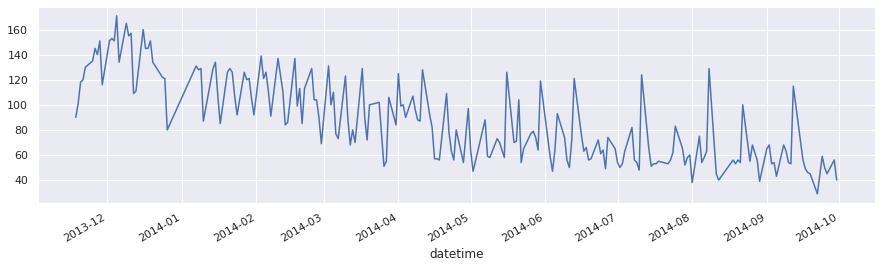

In [372]:
train["y"].plot(figsize=(15, 4))

* Check the scatter plot of the objective variable and explanatory variables (numerical variables)
* Though there seems to be high correlation between month/temperature and sales amout, it is decreasing as days go by, so they are likely 

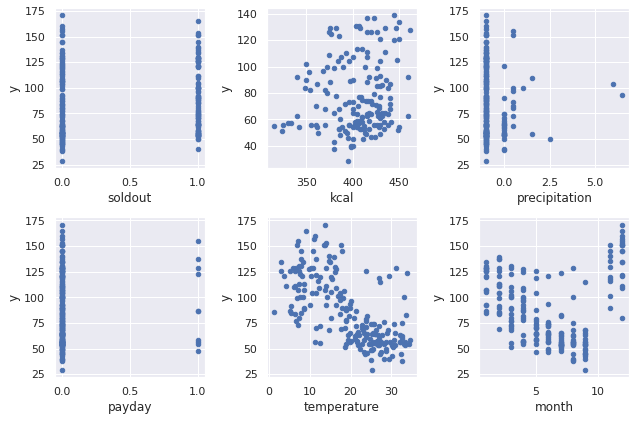

In [373]:
fig, ax = plt.subplots(2,3,figsize=(9,6))
train.plot.scatter(x="soldout", y="y", ax=ax[0][0])
train.plot.scatter(x="kcal", y="y", ax=ax[0][1])
train.plot.scatter(x="precipitation", y="y", ax=ax[0][2])
train.plot.scatter(x="payday", y="y", ax=ax[1][0])
train.plot.scatter(x="temperature", y="y", ax=ax[1][1])
train.plot.scatter(x="month", y="y", ax=ax[1][2])
plt.tight_layout()

In [374]:
# Jupyter Notebook 上で Matplotlib はどう動いているのか？
# https://qiita.com/U25CE/items/c2714bf5903de84bf47b

In [375]:
plt.gcf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [376]:
# Matplotlib plt.subplots()の使い方｜FigureとAxesを同時生成！
# https://www.yutaka-note.com/entry/matplotlib_subplots

In [377]:
# matplotlibのめっちゃまとめ
# https://qiita.com/nkay/items/d1eb91e33b9d6469ef51

In [378]:
# Google Colabでまたまた日本語表示が豆腐不可避な方に（2019/10/27時点）
# https://qiita.com/siraasagi/items/d72f60c25b30269d89e4

# 日本語フォントをダウンロードする。
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-18ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [379]:
# キャッシュを削除する。
# !rm /root/.cache/matplotlib/fontList.json　# 旧cache
!rm /root/.cache/matplotlib/fontlist-v310.json # 消すべきcache

# ランタイムを再起動する。(2020/10/14 この手順は不要ですので、スキップしてください)

rm: cannot remove '/root/.cache/matplotlib/fontlist-v310.json': No such file or directory


In [380]:
import matplotlib
matplotlib.get_cachedir()

'/root/.cache/matplotlib'

In [381]:
ls /root/.cache/matplotlib

tex.cache/


In [382]:
ls /root/.cache/matplotlib/tex.cache

In [383]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(font="IPAGothic") # , style="white"

In [384]:
ls /root/.cache/matplotlib/tex.cache

In [385]:
# Colaboratoryでmatplotlibの日本語表示
# https://qiita.com/unvavo/items/a907cb927bdadc1d8d0c%E3%80%80
# 試してみたが、駄目だった

In [386]:
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [387]:
# 下の方に試行錯誤の記録を残しているが（順番が前後している）、
# Colab Proに切り替えたことで豆腐化の問題は一旦解決
# したかに思えたが、下記セルでまた豆腐になる？
# キャッシュを消す必要？Colabなら消せる？
import matplotlib.pyplot as plt
import numpy as np
import japanize_matplotlib
japanize_matplotlib.japanize()

* Check the objective variable and explanatory variables (Category variables) and box plot
* Whether the value of "remarks" is a special menue or none seems to have a notable impact on the sales volume

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28779 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37329 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24555 missing from current font.
  font.set_

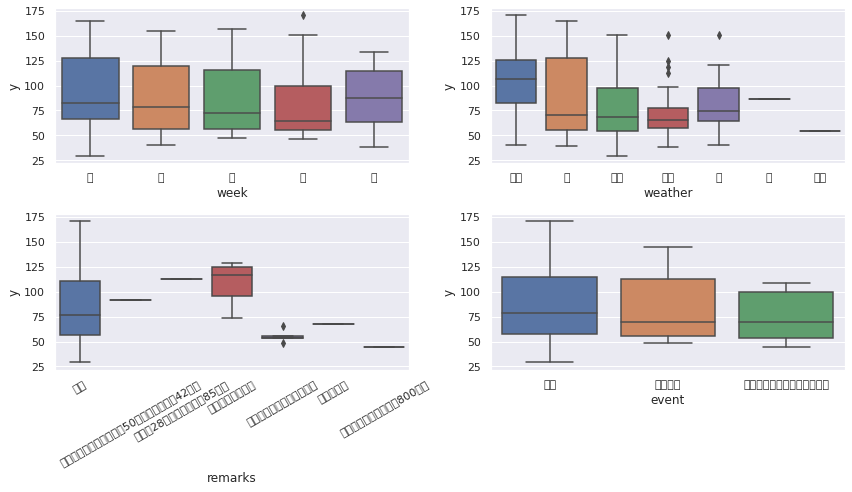

In [388]:
# fontがないと言って長いエラーを吐く
fig, ax = plt.subplots(2, 2, figsize=(12, 7), tight_layout=True)
sns.boxplot(x="week", y="y", data=train, ax=ax[0][0])
sns.boxplot(x="weather", y="y", data=train, ax=ax[0][1])
sns.boxplot(x="remarks", y="y", data=train, ax=ax[1][0])
ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(), rotation=30)
sns.boxplot(x="event", y="y", data=train, ax=ax[1][1])

* Spikes of the sales in the latter half decrease when we exclude "お楽しみメニュー".   
So, the cause of the spikes might be "お楽しみメニュー".  
* According to a median test, whether a record has an "お楽しみメニュー" or not means a significant difference.

In [389]:
# Matplotlibで簡単に日本語を表示する方法（Windows）
# https://gammasoft.jp/blog/matplotlib-japanese-fonts/
# -> As a result, I didn't use this knowledge above but the one below.

In [390]:
# Matplotlibの日本語の文字化けを直す方法【Python】
# →Colab向けではなかった

In [391]:
# 【matplotlib】日本語を表示しよう(Google Colaboratory編)
# https://www.teamxeppet.com/matplotlib_in_japanize-colabo/

# 日本語を最も簡単に表示させる方法としてjapanize-matplotlibが有効的です。
# →やってみたが、うまくいかず。

In [392]:
#日本語化は一旦あきらめる。社内で誰かうまくいった人がいたら教えてもらう

In [393]:
# Google Colabでまたまた日本語表示が豆腐不可避な方に（2019/10/27時点）
# https://qiita.com/siraasagi/items/d72f60c25b30269d89e4
# →だめだった
# →できるらしいので、再度やってみる

In [394]:
!ls -ll /root/.cache/matplotlib/

total 4
drwxr-xr-x 2 root root 4096 Oct 28 13:52 tex.cache


In [395]:
!ls -ll /root/.cache/matplotlib/

total 4
drwxr-xr-x 2 root root 4096 Oct 28 13:52 tex.cache


In [396]:
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [397]:
import matplotlib.pyplot as plt
import numpy as np
import japanize_matplotlib
japanize_matplotlib.japanize()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12486 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12486 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12473 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12488 missing from current font.
  font.set_text

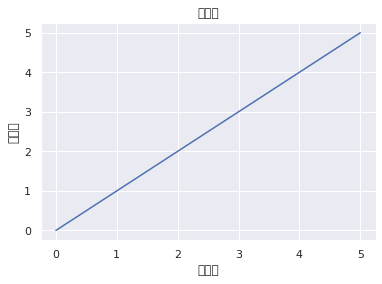

In [398]:
x = range(6)
y = np.linspace(0,5,6)

plt.plot(x, y)
plt.title('テスト')
plt.xlabel('テスト')
plt.ylabel('テスト')

plt.show()

In [399]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

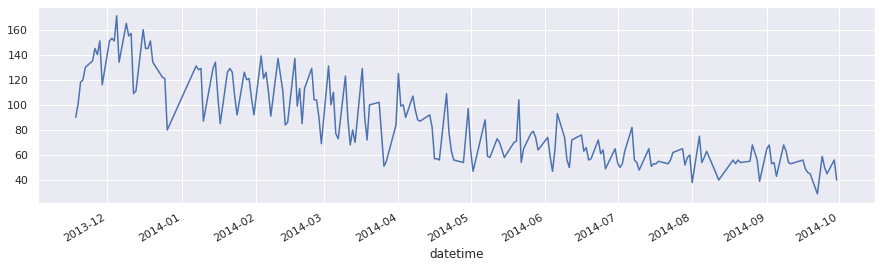

In [400]:
train[train["remarks"]!="お楽しみメニュー"]["y"].plot(figsize=(15,4))

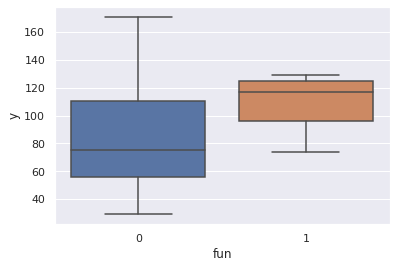

In [401]:
train["fun"] = train["remarks"].apply(lambda x: 1 if x=="お楽しみメニュー" else 0)
sns.boxplot(x="fun", y="y", data=train)

In [402]:
train["fun"]

datetime
2013-11-18    0
2013-11-19    0
2013-11-20    0
2013-11-21    0
2013-11-22    0
2013-11-25    0
2013-11-26    0
2013-11-27    0
2013-11-28    0
2013-11-29    0
             ..
2014-09-16    0
2014-09-17    0
2014-09-18    0
2014-09-19    0
2014-09-22    0
2014-09-24    0
2014-09-25    0
2014-09-26    0
2014-09-29    0
2014-09-30    0
Name: fun, Length: 207, dtype: int64

In [403]:
train.columns

Index(['datetime', 'y', 'week', 'soldout', 'name', 'kcal', 'remarks', 'event',
       'payday', 'weather', 'precipitation', 'temperature', 'month', 'day',
       'fun'],
      dtype='object')

In [404]:
from scipy.stats import median_test

In [405]:
# median_test

In [406]:
stat,p,med,tbl = median_test(train[train["fun"]==1]["y"], train[train["fun"]==0]["y"])

In [407]:
print("p", p, "stat", stat)

p 0.007057960766247775 stat 7.2581589841730345


In [408]:
# type(train)

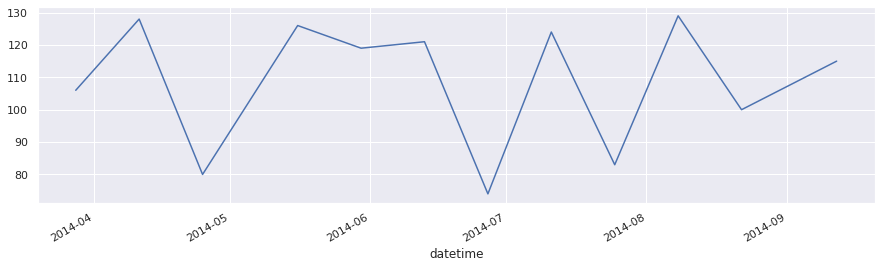

In [409]:
train[train["remarks"]=="お楽しみメニュー"]["y"].plot(figsize=(15,4))

In [410]:
# train[train["remarks"]=="お楽しみメニュー"]["y"]

In [411]:
# type(train[train["remarks"]=="お楽しみメニュー"]["y"])

In [412]:
# train[train["remarks"]=="お楽しみメニュー"]

In [413]:
# type(train[train["remarks"]=="お楽しみメニュー"])

In [414]:
# type(train[train["remarks"]=="お楽しみメニュー"])

In [415]:
# type(train)

In [416]:
train["curry"] = train["name"].apply(lambda x: 1 if x.find("カレー")>0 else 0)

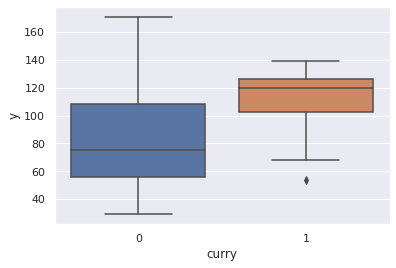

In [417]:
sns.boxplot(x="curry", y="y", data=train)

In [418]:
# train

In [419]:
# type(train["name"].apply)

In [420]:
# type(train["name"])

In [421]:
# type(train["name"][0])

In [422]:
# type(train["name"][0].find)

In [423]:
# help(train["name"][0].find)

In [424]:
# help(train["name"].apply)

In [425]:
stat, p, md, tbl = median_test(train[train["curry"]==1]["y"], train[train["curry"]==0]["y"])

In [426]:
# md

In [427]:
# tbl

In [428]:
print("p: ", p, "stat", stat)

p:  0.018152625492681023 stat 5.581359548021204


In [429]:
# 値が合わない

In [430]:
train = pd.read_csv("/drive/My Drive/Colab Notebooks/signate/bento/train.csv")

In [431]:
test = pd.read_csv("/drive/My Drive/Colab Notebooks/signate/bento/test.csv")

In [432]:
sample = pd.read_csv("/drive/My Drive/Colab Notebooks/signate/bento/sample.csv", header=None)

In [433]:
# train.info()

In [434]:
# type(train.info)

In [435]:
# help(train.info)

In [436]:
# test.info()

In [437]:
# sample.info()

In [438]:
# sample

In [439]:
sample_with_header = pd.read_csv("/drive/My Drive/Colab Notebooks/signate/bento/sample.csv")

In [440]:
# sample_with_header

In [441]:
train["t"] = 1

In [442]:
test["t"] = 0

In [443]:
type(test["t"])

pandas.core.series.Series

In [444]:
dat = pd.concat([train, test], sort=True)

In [445]:
# pd.set_option('display.max_rows', 10)

In [446]:
# dat

In [447]:
dat = dat.reset_index(drop=True)
# dat

In [448]:
dat["days"] = dat.index

In [449]:
# pd.set_option('display.max_rows', 10)

In [450]:
dat["days"]

0        0
1        1
2        2
3        3
4        4
5        5
6        6
7        7
8        8
9        9
      ... 
237    237
238    238
239    239
240    240
241    241
242    242
243    243
244    244
245    245
246    246
Name: days, Length: 247, dtype: int64

In [451]:
# dat

In [452]:
dat["precipitation"] = dat["precipitation"].apply(lambda x: -1 if x=="--" else x).astype(np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [453]:
dat["fun"] = dat["remarks"].apply(lambda x: 1 if x=="お楽しみメニュー" else 0)
dat["curry"] = dat["name"].apply(lambda x: 1 if x.find("カレー")>=0 else 0)

In [454]:
dat

,datetime,event,kcal,name,payday,precipitation,remarks,soldout,t,temperature,weather,week,y,days,fun,curry
0,2013-11-18,NaN,NaN,厚切りイカフライ,NaN,-1.0,NaN,0,1,19.8,快晴,月,90.0,0,0,0
1,2013-11-19,NaN,NaN,手作りヒレカツ,NaN,-1.0,NaN,1,1,17.0,快晴,火,101.0,1,0,0
2,2013-11-20,NaN,NaN,白身魚唐揚げ野菜あん,NaN,-1.0,NaN,0,1,15.5,快晴,水,118.0,2,0,0
3,2013-11-21,NaN,NaN,若鶏ピリ辛焼,NaN,-1.0,NaN,1,1,15.2,快晴,木,120.0,3,0,0
4,2013-11-22,NaN,NaN,ビッグメンチカツ,NaN,-1.0,NaN,1,1,16.1,快晴,金,130.0,4,0,0
5,2013-11-25,NaN,NaN,鶏の唐揚,NaN,-1.0,NaN,1,1,14.6,曇,月,135.0,5,0,0
6,2013-11-26,NaN,NaN,豚のスタミナ炒め,NaN,-1.0,NaN,0,1,17.9,快晴,火,145.0,6,0,0
7,2013-11-27,NaN,NaN,ボローニャ風カツ,NaN,-1.0,NaN,1,1,14.7,晴れ,水,140.0,7,0,0
8,2013-11-28,NaN,NaN,ハンバーグ,NaN,-1.0,NaN,0,1,17.7,薄曇,木,151.0,8,0,0
9,2013-11-29,NaN,NaN,タルタルinソーセージカツ,NaN,-1.0,NaN,0,1,12.1,快晴,金,116.0,9,0,0


In [455]:
cols = ["precipitation", "weather", "days", "fun", "curry", "y"]

In [456]:
# cols

In [457]:
from sklearn.model_selection import KFold

In [458]:
# KFold

In [459]:
from sklearn.metrics import mean_squared_error as MSE

In [460]:
# MSE

In [461]:
from sklearn.linear_model import LinearRegression as LR

In [462]:
# LR

In [463]:
from sklearn.ensemble import RandomForestRegressor as RF

In [464]:
# RF

In [465]:
def learning(trainX, y_train):
    model1 = LR()
    model2 = RF(n_estimators=100, max_depth=4, random_state=777)
    model1.fit(trainX["days"].values.reshape(-1, 1), y_train)
    pred = model1.predict(trainX["days"].values.reshape(-1,1))

    pred_sub = y_train - pred
    model2.fit(trainX.iloc[:, ~trainX.columns.str.match("y")], pred_sub)
    return model1, model2

In [466]:
# help(learning)